In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load csv into dataframe
df = pd.read_csv("/Users/alexanderfrankow/Desktop/Python/myenv/CSV/SupplyChain.csv")
df = df.drop(df.columns[0], axis=1)
df.set_index(df.columns[0], inplace=True)
df.head(20)


,QI,Machine,PreCheck,NumberPins,BoardID,Price,BoardCategory,MaterialOrigin
ID,,,,,,,,
1,0,3.0,0,22.0,A/5 21171,7.2500,NaN,S
2,1,1.0,1,38.0,PC 17599,71.2833,C85,C
3,1,3.0,1,26.0,STON/O2. 3101282,7.9250,NaN,S
4,1,1.0,1,35.0,113803,53.1000,C123,S
5,0,3.0,0,35.0,373450,8.0500,NaN,S
6,0,3.0,0,NaN,330877,8.4583,NaN,Q
7,0,1.0,0,54.0,17463,51.8625,E46,S
8,0,3.0,0,2.0,349909,21.0750,NaN,S
9,1,3.0,1,27.0,347742,11.1333,NaN,S


In [113]:
print(df.info())
print(f"The Dataframe has {df.shape[0]} observations with {df.shape[1]} columns" )
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   QI              891 non-null    int64  
 1   Machine         802 non-null    float64
 2   PreCheck        891 non-null    int64  
 3   NumberPins      714 non-null    float64
 4   BoardID         891 non-null    object 
 5   Price           880 non-null    float64
 6   BoardCategory   204 non-null    object 
 7   MaterialOrigin  889 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB
None
The Dataframe has 891 observations with 8 columns
               QI     Machine    PreCheck  NumberPins       Price
count  891.000000  802.000000  891.000000  714.000000  880.000000
mean     0.383838    2.301746    0.352413   29.699118   32.332125
std      0.486592    0.836867    0.477990   14.526497   49.964536
min      0.000000    1.000000    0.000000    0.420000    0.000000
25%

In [115]:
cols_to_categorical = ['QI', 'Machine', 'PreCheck', 'BoardID', 'BoardCategory', 'MaterialOrigin']
df[cols_to_categorical] = df[cols_to_categorical].astype('category')

In [116]:
nan_summary = df.isnull().sum().to_frame(name='Missing Value')
non_nan_summary = df.notnull().sum().to_frame(name='No Missing Value')
total_rows = len(df)
nan_percentage = (nan_summary / total_rows * 100).round(2)
nan_percentage.columns = ['Relative Missing Values']
contingency_table = pd.concat([nan_summary, non_nan_summary, nan_percentage], axis=1)

print(contingency_table)

                Missing Value  No Missing Value  Relative Missing Values
QI                          0               891                     0.00
Machine                    89               802                     9.99
PreCheck                    0               891                     0.00
NumberPins                177               714                    19.87
BoardID                     0               891                     0.00
Price                      11               880                     1.23
BoardCategory             687               204                    77.10
MaterialOrigin              2               889                     0.22


In [117]:
df = df.drop(df.columns[6], axis=1)
print(df.describe(include='all'))

           QI  Machine  PreCheck  NumberPins BoardID       Price  \
count   891.0    802.0     891.0  714.000000     891  880.000000   
unique    2.0      3.0       2.0         NaN     681         NaN   
top       0.0      3.0       0.0         NaN    1601         NaN   
freq    549.0    438.0     577.0         NaN       7         NaN   
mean      NaN      NaN       NaN   29.699118     NaN   32.332125   
std       NaN      NaN       NaN   14.526497     NaN   49.964536   
min       NaN      NaN       NaN    0.420000     NaN    0.000000   
25%       NaN      NaN       NaN   20.125000     NaN    7.895800   
50%       NaN      NaN       NaN   28.000000     NaN   14.454200   
75%       NaN      NaN       NaN   38.000000     NaN   31.068750   
max       NaN      NaN       NaN   80.000000     NaN  512.329200   

       MaterialOrigin  
count             889  
unique              3  
top                 S  
freq              644  
mean              NaN  
std               NaN  
min            

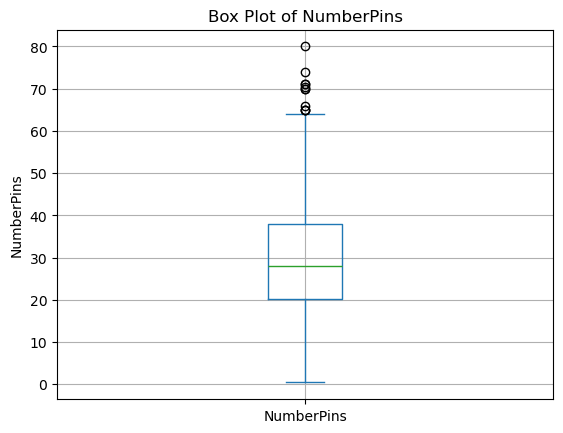

In [109]:
df['NumberPins'].plot.box(title="Box Plot of NumberPins")
plt.ylabel("NumberPins")
plt.grid(True)
plt.show()

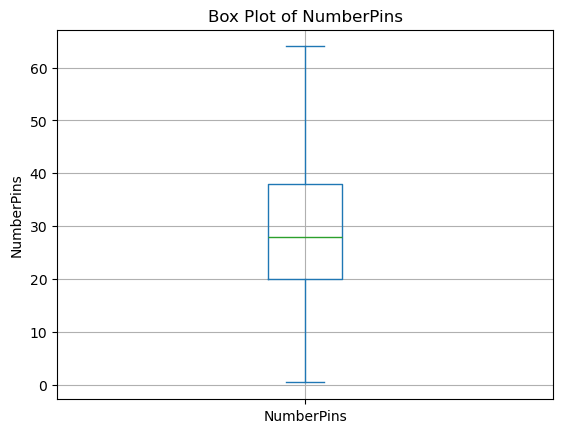

In [119]:
Q1 = df['NumberPins'].quantile(0.25)
Q3 = df['NumberPins'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
df.loc[df['NumberPins'] > upper_fence, 'NumberPins'] = np.nan
df['NumberPins'].plot.box(title="Box Plot of NumberPins")
plt.ylabel("NumberPins")
plt.grid(True)
plt.show()


In [122]:
nan_summary = df.isnull().sum().to_frame(name='Missing Value')
non_nan_summary = df.notnull().sum().to_frame(name='No Missing Value')
total_rows = len(df)
nan_percentage = (nan_summary / total_rows * 100).round(2)
nan_percentage.columns = ['Relative Missing Values']
contingency_table = pd.concat([nan_summary, non_nan_summary, nan_percentage], axis=1)
print(contingency_table)

df['NumberPins'].fillna(df['NumberPins'].mean(), inplace=True)

                Missing Value  No Missing Value  Relative Missing Values
QI                          0               891                     0.00
Machine                    89               802                     9.99
PreCheck                    0               891                     0.00
NumberPins                188               703                    21.10
BoardID                     0               891                     0.00
Price                      11               880                     1.23
MaterialOrigin              2               889                     0.22


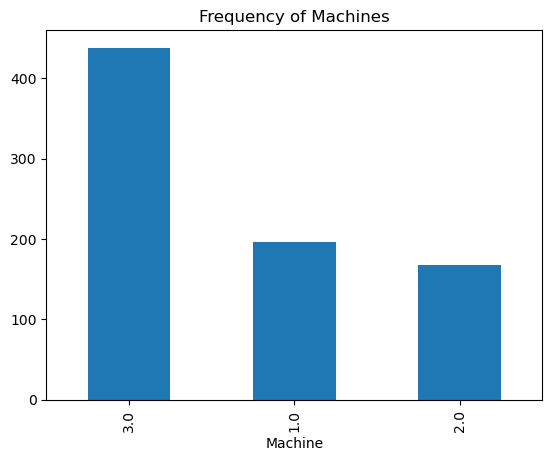

In [124]:
df['Machine'].value_counts().plot(kind='bar', title="Frequency of Machines")
plt.show()

In [131]:
contingency_table = pd.crosstab(df['QI'], df['PreCheck'])
print(contingency_table)
print("In percentage:")
prop_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(prop_table)

PreCheck    0    1
QI                
0         468   81
1         109  233
In percentage:
PreCheck         0         1
QI                          
0         0.852459  0.147541
1         0.318713  0.681287


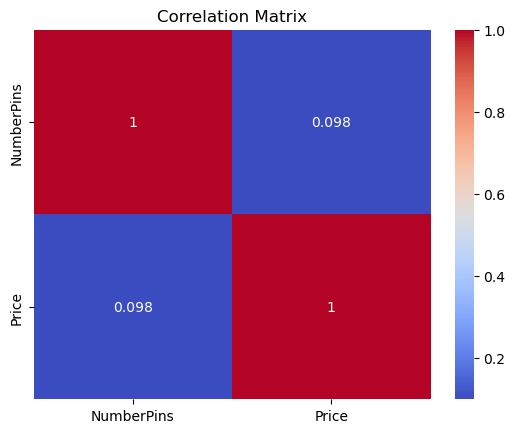

In [135]:
corr_matrix = df[['NumberPins','Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()